# Lab 2: Programming in Python

In this lab, we'll learn programming basics, including how to import modules and work with data structures called Tables. Tables are important. When we read in data from a .csv, it will be read into a Table. We will practice manipulating data (e.g., by looking at different subsets and slices of the dataset). Not only will Tables contain datasets, they will be the objects we store model results/analyses in in the future. Because of this, the *Tables* might be the most important Python object for this course. 

**Reading:**
 - [Introduction to tables](https://www.inferentialthinking.com/chapters/03/4/Introduction_to_Tables)

*Optional Reading:*
- [Documentation for datascience package](http://data8.org/datascience/)

Please complete this lab by providing answers in cells after the question. Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **.html file** and submit it in **ELMS**.

## Packages in Python

Recall that we went over importing code that others have already created. The main one we'll be using in this class is `datascience`. We'll also frequently use `numpy` (Numerical Python), which has many useful computational tools. To load a package, we can use the `import` command.

In [ ]:
# Recall we can leave comments in Python using #. Comments make code more transparent and readable and we should always comment our code. 
# load required packages

import numpy as np # imports numpy into shorthand expression np
import datascience as ds # imports datascience into shorthand expression ds

We were able to access a NumPy object last time (the value of pi). There are also other intuitive objects.

In [ ]:
np.e # Euler's number is found in NumPy

We can also access functions. For example, we can use `np.log` to take the natural log of numbers.

In [ ]:
np.log(np.e)

Most packages will have a mix of different objects, functions, and classes (types of objects) that you can bring in. 

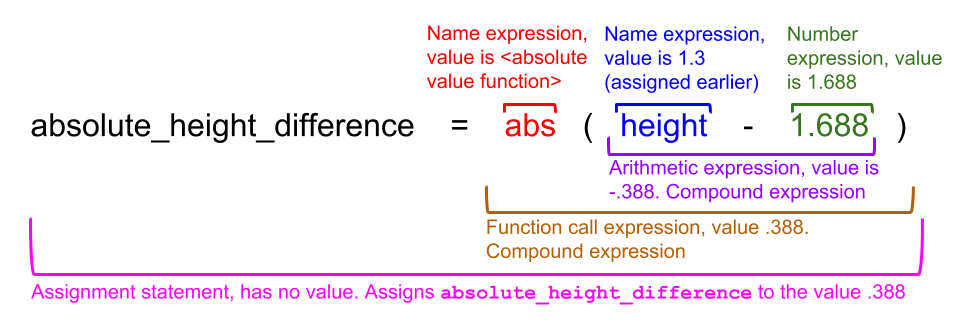## Review: The building blocks of Python code

The two building blocks of Python code are *expressions* and *statements*.  An **expression** is a piece of code that:

* is self-contained, meaning it would make sense to write it on a line by itself, and
* usually evaluates to some value.


Here are two expressions that both evaluate to 3:

    3
    5 - 2

    
One important type of expression is the **call expression**. A call expression begins with the name of a function and is followed by the argument(s) of that function in parentheses. The function returns some value based on its arguments. Some important mathematical functions are listed below.

| Function | Description                                                   |
|----------|---------------------------------------------------------------|
| `abs`      | Returns the absolute value of its argument.                    |
| `max`      | Returns the maximum of all its arguments.                      |
| `min`      | Returns the minimum of all its arguments.                      |
| `pow`      | Raises its first argument to the power of its second argument. |
| `round`    | Rounds its argument to the nearest integer.                    |

Here are two call expressions that both evaluate to 3:

    abs(2 - 5)
    max(round(2.8), min(pow(2, 10), -1 * pow(2, 10)))

The expression `5 - 2` and the two call expressions given above are examples of **compound expressions**, meaning that they are actually combinations of several smaller expressions. `5 - 2` combines the expressions `5` and `2` by subtraction. In this case, `5` and `2` are called **subexpressions** because they're expressions that are part of a larger expression.

A **statement** is a whole line of code. Some statements are just expressions. (The expressions listed above are examples of this.)

Other statements *make something happen* rather than simply *have a value*. For example, we can store the values of these expressions in objects using the assignment operator **=** in an assignment expression. The text on the left-hand side of object assignment will be the object name, and the values we want to store in that object are on the righthand side. Once an object has been created, we can use it in the right hand side of object assignment. 

    x = 3 # x and 3 are now the same as far as Python is concerned
    y = x + 1 # will be 4, because x evaluates to 3


A good way to think about this is that we're **evaluating the right-hand side** of the equals sign and **assigning it to the left-hand side**. Here are some other assignment statements:
    
    height = 1.3
    the_number_five = abs(-5)
    absolute_height_difference = abs(height - 1.688)

An important idea in programming is that large, interesting things can be built by combining many simple, less interesting things. The key to understanding a complicated piece of code is breaking it down into its simple components.

For example, a lot is going on in the last statement above, but it's really just a combination of a few things. This picture describes what's going on.

<img src="statement.png">

## Table operations

The table `farmers_markets.csv` contains data on farmers' markets in the United States  (data collected [by the USDA](https://apps.ams.usda.gov/FarmersMarketsExport/ExcelExport.aspx)).  Each row represents one such market.

Run the next cell to load the `farmers_markets` table.

In [ ]:
# Just run this cell

farmers_markets = ds.Table.read_table('farmers_markets.csv')

Let's examine our table to see what data it contains. We can use the method `show` to display the first five rows of `farmers_markets`. 

*Note:* The terms "method" and "function" are technically not the same thing. A method is essentially a function that is packaged with a certain type of object and only works for that type of object. Unlike functions, you use a method with the format `<object>.<method>()` as opposed to `<function>(<object>)`.

**Hint:** `tbl.show(3)` will show the first 3 rows of `tbl`. Additionally, make sure not to call `.show()` without an argument as this could crash your kernel!


In [ ]:
farmers_markets.show(5)

Notice that some of the values in this table are missing, as denoted by "nan." This means either that the value is not available/missing (e.g., we don’t know the market’s street address) or not applicable (e.g., the market doesn’t have a street address). You'll also notice that the table has a large number of columns in it!

### `num_columns`

The table attribute `num_columns` returns the number of columns in a table. An attribute works similar to a method, but is just a characteristic of the object. To view an object's attribute, you can use `<object>.<attribute>`. Note that you do not use parentheses. You can think of this as just displaying another object—you aren't doing anything with the actual object and are instead just accessing information about it.

Example call: `<tbl>.num_columns`

<font color = 'red'>**Question 1: Find the number of columns in our farmers' markets dataset.**</font>

Assign the number of columns to `num_farmers_markets_columns`.

### `num_rows`

Similarly, the property `num_rows` tells you how many rows are in a table.

In [ ]:
# Finding the number of rows

num_farmers_markets_rows = farmers_markets.num_rows
print("The table has", num_farmers_markets_rows, "rows in it!")

### `select`

Most of the columns are about particular products—whether the market sells tofu, pet food, etc. If we're not interested in that information, it just makes the table difficult to read. This comes up more than you might think, because people who collect and publish data may not know ahead of time what people will want to do with it.

In such situations, we can use the table method `select` to choose only the columns that we want in a table. It takes any number of arguments. Each should be the name of a column in the table. It returns a new table with only those columns in it. The columns are in the order *in which they were listed as arguments*.

For example, the value of `farmers_markets.select("MarketName", "State")` is a table with only the name and the state of each farmers' market in `farmers_markets`.



<font color = 'red'>**Question 2: Use `select` to create a table with only the name, city, state, latitude (`y`), and longitude (`x`) of each market. Call that new table `farmers_markets_locations`.**</font>

*Hint:* Make sure to be exact when using column names with `select`; double-check capitalization!

### `drop`

`drop` serves the same purpose as `select`, but it takes away the columns that you provide rather than the ones that you don't provide. Like `select`, `drop` returns a new table.

<font color = 'red'>**Question 3: Suppose you just didn't want the `FMID` or `updateTime` columns in `farmers_markets`.  Create a table that's a copy of `farmers_markets` but doesn't include those columns.  Call that table `farmers_markets_without_fmid`.**</font>

Now, suppose we want to answer some questions about farmers' markets in the US. For example, which market(s) have the largest longitude (given by the `x` column)? 

To answer this, we'll sort `farmers_markets_locations` by longitude.

In [ ]:
farmers_markets_locations.sort('x')

Oops, that didn't answer our question because we sorted from smallest to largest longitude. To look at the largest longitudes, we'll have to sort in reverse order.

In [ ]:
farmers_markets_locations.sort('x', descending=True)

(The `descending=True` bit is called an *optional argument*. It has a default value of `False`, so when you explicitly tell the function `descending=True`, then the function will sort in descending order.)

### `sort`

Some details about sort:

1. The first argument to `sort` is the name of a column to sort by.
2. If the column has text in it, `sort` will sort alphabetically; if the column has numbers, it will sort numerically.
3. The value of `farmers_markets_locations.sort("x")` is a *copy* of `farmers_markets_locations`; the `farmers_markets_locations` table doesn't get modified. For example, if we called `farmers_markets_locations.sort("x")`, then running `farmers_markets_locations` by itself would still return the unsorted table.
4. Rows always stick together when a table is sorted.  It wouldn't make sense to sort just one column and leave the other columns alone.  For example, in this case, if we sorted just the `x` column, the farmers' markets would all end up with the wrong longitudes.

<font color = 'red'>**Question 4: Create a version of `farmers_markets_locations` that's sorted by latitude (`y`), with the largest latitudes first.  Call it `farmers_markets_locations_by_latitude`.**</font>

Now let's say we want a table of all farmers' markets in Maryland. Sorting won't help us much here because Maryland is closer to the middle of the dataset.

Instead, we use the table method `where`.

In [ ]:
md_farmers_markets = farmers_markets_locations.where('State', ds.are.equal_to('Maryland'))
md_farmers_markets.show(5)

Ignore the syntax for the moment.  Instead, try to read that line like this:

> Assign the name **`md_farmers_markets`** to a table whose rows are the rows in the **`farmers_markets_locations`** table **`where`** the **`'State'`**s **`are` `equal` `to` `Maryland`**.

### `where`

Now let's dive into the details a bit more.  `where` takes 2 arguments:

1. The name of a column.  `where` finds rows where that column's values meet some criterion.
2. A predicate that describes the criterion that the column needs to meet.

The predicate in the example above called the function `are.equal_to` with the value we wanted, 'Maryland'.  We'll see other predicates soon. Note: Since these predicates come from the datacience package, you will need to refer to ds (our shorthand notation) to load them

`where` returns a table that's a copy of the original table, but **with only the rows that meet the given predicate**.

<font color = 'red'>**Question 5: Use `md_farmers_markets` to create a table called `cp_markets` containing farmers' markets in College Park, MD.**</font>

Recognize any of them?

So far we've only been using `where` with the predicate that requires finding the values in a column to be *exactly* equal to a certain value. However, there are many other predicates. Here are a few:

|Predicate|Example|Result|
|-|-|-|
|`ds.are.equal_to`|`ds.are.equal_to(50)`|Find rows with values equal to 50|
|`ds.are.not_equal_to`|`ds.are.not_equal_to(50)`|Find rows with values not equal to 50|
|`ds.are.above`|`ds.are.above(50)`|Find rows with values above (and not equal to) 50|
|`ds.are.above_or_equal_to`|`ds.are.above_or_equal_to(50)`|Find rows with values above 50 or equal to 50|
|`ds.are.below`|`ds.are.below(50)`|Find rows with values below 50|
|`ds.are.between`|`ds.are.between(2, 10)`|Find rows with values above or equal to 2 and below 10|

## IMDB Dataset

Now that you're familiar with table operations, let’s answer some interesting questions about another dataset!

Run the cell below to load the `imdb` table. It contains information about the 250 highest-rated movies on IMDb.

In [ ]:
# Bring in the table

imdb = ds.Table.read_table('imdb.csv')
imdb.show(5)

<font color = 'red'>**Question 6. Using `where` and one of the predicates from the table above, find all movies with a rating higher than 8.4.  Assign this filtered table to the name `really_highly_rated`. It should contain the same columns as `imdb`. Display the first five rows of that table (they don't need to be ordered in a particular way).**</font>

In [ ]:

really_highly_rated = ...





<font color = 'red'>**Question 7. Create a table of movies released between 2010 and 2016 (inclusive) with ratings above 8.4. The table should only contain the columns `Title` and `Rating`, in that order.**</font>

Assign the table to the name `above_8_4`.

*Hint:* Think about the steps that you need to take and try to put them in an order that makes sense. Feel free to create intermediate tables for each step, but please make sure you assign your final table the name `above_8_4`!

In [ ]:
above_8_4 = ...

<font color = 'red'>**Question 8. Use `num_rows` (and arithmetic) to find the *proportion* of all movies in the dataset that were released 1900-1999, and the *proportion* of all movies in the dataset that were released in the year 2000 or later.**</font>

Assign `proportion_in_20th_century` to the proportion of all movies in the dataset that were released 1900-1999, and `proportion_in_21st_century` to the proportion of all movies in the dataset that were released in the year 2000 or later.

*Hint:* The *proportion* of movies released in the 1900s is the *number* of movies released in the 1900s divided by the *total number* of movies.


In [ ]:
num_movies_in_dataset = imdb.num_rows
num_in_20th_century = ...
num_in_21st_century = ...
proportion_in_20th_century = ...
proportion_in_21st_century = ...
print("Proportion in 20th century:", proportion_in_20th_century)
print("Proportion in 21st century:", proportion_in_21st_century)

## Summary

For your reference, here's a table of all the functions and methods we saw in this lab. We'll learn more methods to add to this table in the coming week!

|Name|Example|Purpose|
|-|-|-|
|`sort`|`tbl.sort("N")`|Create a copy of a table sorted by the values in a column|
|`where`|`tbl.where("N", ds.are.above(2))`|Create a copy of a table with only the rows that match some *predicate*|
|`num_rows`|`tbl.num_rows`|Compute the number of rows in a table|
|`num_columns`|`tbl.num_columns`|Compute the number of columns in a table|
|`select`|`tbl.select("N")`|Create a copy of a table with only some of the columns|
|`drop`|`tbl.drop("2*N")`|Create a copy of a table without some of the columns|

